In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bar_parallax_analytic_model import bar_parallax3D, bar_parallax1D

# We can test with different bar structure parameters
custom_params = {
    'sigma_x': 0.67,  # Longer bar major axis
    'sigma_y': 0.29,  # Shorter bar minor axis
    'sigma_z': 0.27,  # Thinner bar vertically
    'r_E': 8.2,       # Closer bar center
    's_max': 15.0,     # Max distance from us for averaging
    #'epsrel': 1e-6    # Relative error tolerance for integration
}


# Define parameter ranges
l_range = np.arange(-15, 16, 1)  # Galactic longitude from -15 to +15 degrees
bar_angles = [0, 15, 20, 25, 29.4, 35, 40, 45, 90]  # Different bar angles to compare
b_values = [-3,-2, -1, -0.5, 0, 0.5, 1, 2, 3]  # different galactic latitudes


In [2]:
from bar_angle_Synthpop import BarAngleVariationTool
import os

tool = BarAngleVariationTool()

# Parameters
fixed_bar_angle = 25.0  # degrees
fixed_b_deg = -3.0      # degrees
longitude_range = np.arange(-15, 16)  # degrees
solid_angle = 1e-3  # solid angle in deg^2


/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def sigma_clipped_stats(data, sigma=3):
    from astropy.stats import sigma_clip
    data = np.array(data)
        
    clipped_data = sigma_clip(data, sigma=sigma)
    clipped_mean = np.mean(clipped_data)
    clipped_std_error = np.std(clipped_data) / np.sqrt(len(clipped_data))
    return clipped_mean, clipped_std_error

In [4]:
output_dir = 'TheoreticalBarParallax/'
os.makedirs(output_dir, exist_ok=True)

results = []
for l in longitude_range:
    csv_filename = f'{output_dir}/bar_angle_{fixed_bar_angle:.1f}_l{l:.3f}_b{fixed_b_deg:.3f}.csv'
    catalog, distance_distribution = tool.generate_catalog(
    bar_angle=fixed_bar_angle,
    l_deg=l,
    b_deg=fixed_b_deg,
    solid_angle=solid_angle,
    solid_angle_unit='deg^2'
    )
    
    catalog.to_csv(csv_filename, index=False)
    print(f"    -> Generated and saved catalog with {len(catalog)} stars")
    # Apply filtering criteria 
    mask = (catalog['Dist'] < 30) & (catalog['pop'] == 0) & (catalog['Gaia_G_EDR3'] < 18.5)#population 0: bar stars
    df_filtered = catalog[mask]

    parallax_values = 1.0 / df_filtered['Dist']
    distance_values = df_filtered['Dist']
    
    # Calculate sigma-clipped statistics
    clipped_parallax_mean, clipped_parallax_error = sigma_clipped_stats(parallax_values, sigma=3)
    clipped_distance_mean, clipped_distance_error = sigma_clipped_stats(distance_values, sigma=3)
    results.append({
        'longitude': l,
        'clipped_parallax': clipped_parallax_mean,
        'clipped_parallax_error': clipped_parallax_error,
        'n_stars': len(df_filtered),
        'clipped_distance': clipped_distance_mean,
        'clipped_distance_error': clipped_distance_error
        })


 3466 - Execution Date: 12-12-2025 15:14:07


################################ Settings #################################
 3467 - # reading default parameters from
 3467 - default_config_file =  /opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/config_files/_default.synthpop_conf 
 3468 - # read configuration from 
 3469 - config_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/config_files/huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 3469 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "bar_angle_25.0",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 1852548746,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    

    -> Generated and saved catalog with 25399 stars




# Population 1;  halo -----------------------------------------------------
 24502 - # Initialize Population 1 (halo) from 
 24502 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 24950 - # Initialize Population 2 (nsd) from 
 24951 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 25803 - # Initialize Population 3 (thick_disk) from 
 25804 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 26239 - # Initialize Population 4 (thin_disk_1) from 
 26239 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_disk_1.p

    -> Generated and saved catalog with 27546 stars




# Population 1;  halo -----------------------------------------------------
 43226 - # Initialize Population 1 (halo) from 
 43227 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 43687 - # Initialize Population 2 (nsd) from 
 43687 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 44503 - # Initialize Population 3 (thick_disk) from 
 44503 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 44950 - # Initialize Population 4 (thin_disk_1) from 
 44950 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_disk_1.p

    -> Generated and saved catalog with 31099 stars




# Population 1;  halo -----------------------------------------------------
 62327 - # Initialize Population 1 (halo) from 
 62327 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 62773 - # Initialize Population 2 (nsd) from 
 62773 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 63564 - # Initialize Population 3 (thick_disk) from 
 63565 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 64009 - # Initialize Population 4 (thin_disk_1) from 
 64009 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_disk_1.p

    -> Generated and saved catalog with 36389 stars




# Population 1;  halo -----------------------------------------------------
 81381 - # Initialize Population 1 (halo) from 
 81381 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 81831 - # Initialize Population 2 (nsd) from 
 81831 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 82628 - # Initialize Population 3 (thick_disk) from 
 82628 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 83070 - # Initialize Population 4 (thin_disk_1) from 
 83070 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_disk_1.p

    -> Generated and saved catalog with 43914 stars




# Population 1;  halo -----------------------------------------------------
 100568 - # Initialize Population 1 (halo) from 
 100569 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 101028 - # Initialize Population 2 (nsd) from 
 101028 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 101882 - # Initialize Population 3 (thick_disk) from 
 101882 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 102333 - # Initialize Population 4 (thin_disk_1) from 
 102333 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 55954 stars




# Population 1;  halo -----------------------------------------------------
 121189 - # Initialize Population 1 (halo) from 
 121189 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 121652 - # Initialize Population 2 (nsd) from 
 121653 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 122511 - # Initialize Population 3 (thick_disk) from 
 122512 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 122991 - # Initialize Population 4 (thin_disk_1) from 
 122992 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 73187 stars




# Population 1;  halo -----------------------------------------------------
 146382 - # Initialize Population 1 (halo) from 
 146382 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 146852 - # Initialize Population 2 (nsd) from 
 146852 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 147671 - # Initialize Population 3 (thick_disk) from 
 147672 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 148143 - # Initialize Population 4 (thin_disk_1) from 
 148143 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 96948 stars




# Population 1;  halo -----------------------------------------------------
 170186 - # Initialize Population 1 (halo) from 
 170186 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 170655 - # Initialize Population 2 (nsd) from 
 170655 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 171489 - # Initialize Population 3 (thick_disk) from 
 171489 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 171951 - # Initialize Population 4 (thin_disk_1) from 
 171952 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 129776 stars




# Population 1;  halo -----------------------------------------------------
 194654 - # Initialize Population 1 (halo) from 
 194654 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 195129 - # Initialize Population 2 (nsd) from 
 195129 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 195962 - # Initialize Population 3 (thick_disk) from 
 195963 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 196425 - # Initialize Population 4 (thin_disk_1) from 
 196425 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 172690 stars




# Population 1;  halo -----------------------------------------------------
 221465 - # Initialize Population 1 (halo) from 
 221465 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 221941 - # Initialize Population 2 (nsd) from 
 221942 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 222780 - # Initialize Population 3 (thick_disk) from 
 222780 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 223251 - # Initialize Population 4 (thin_disk_1) from 
 223252 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 223508 stars




# Population 1;  halo -----------------------------------------------------
 251316 - # Initialize Population 1 (halo) from 
 251317 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 251784 - # Initialize Population 2 (nsd) from 
 251784 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 252624 - # Initialize Population 3 (thick_disk) from 
 252624 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 253091 - # Initialize Population 4 (thin_disk_1) from 
 253091 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 275826 stars




# Population 1;  halo -----------------------------------------------------
 283547 - # Initialize Population 1 (halo) from 
 283548 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 284018 - # Initialize Population 2 (nsd) from 
 284018 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 284851 - # Initialize Population 3 (thick_disk) from 
 284851 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 285312 - # Initialize Population 4 (thin_disk_1) from 
 285313 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 320331 stars




# Population 1;  halo -----------------------------------------------------
 317655 - # Initialize Population 1 (halo) from 
 317655 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 318110 - # Initialize Population 2 (nsd) from 
 318110 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 318924 - # Initialize Population 3 (thick_disk) from 
 318925 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 319386 - # Initialize Population 4 (thin_disk_1) from 
 319386 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 348457 stars




# Population 1;  halo -----------------------------------------------------
 353291 - # Initialize Population 1 (halo) from 
 353291 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 353758 - # Initialize Population 2 (nsd) from 
 353758 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 354582 - # Initialize Population 3 (thick_disk) from 
 354582 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 355043 - # Initialize Population 4 (thin_disk_1) from 
 355043 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 358531 stars




# Population 1;  halo -----------------------------------------------------
 389164 - # Initialize Population 1 (halo) from 
 389164 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 389681 - # Initialize Population 2 (nsd) from 
 389681 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 390516 - # Initialize Population 3 (thick_disk) from 
 390517 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 390978 - # Initialize Population 4 (thin_disk_1) from 
 390979 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 356202 stars




# Population 1;  halo -----------------------------------------------------
 425400 - # Initialize Population 1 (halo) from 
 425400 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 425881 - # Initialize Population 2 (nsd) from 
 425881 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 426702 - # Initialize Population 3 (thick_disk) from 
 426703 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 427165 - # Initialize Population 4 (thin_disk_1) from 
 427166 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 343587 stars




# Population 1;  halo -----------------------------------------------------
 460977 - # Initialize Population 1 (halo) from 
 460977 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 461451 - # Initialize Population 2 (nsd) from 
 461451 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 462294 - # Initialize Population 3 (thick_disk) from 
 462294 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 462761 - # Initialize Population 4 (thin_disk_1) from 
 462762 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 319243 stars




# Population 1;  halo -----------------------------------------------------
 495540 - # Initialize Population 1 (halo) from 
 495540 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 496008 - # Initialize Population 2 (nsd) from 
 496008 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 496835 - # Initialize Population 3 (thick_disk) from 
 496836 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 497301 - # Initialize Population 4 (thin_disk_1) from 
 497301 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 282826 stars




# Population 1;  halo -----------------------------------------------------
 528595 - # Initialize Population 1 (halo) from 
 528596 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 529065 - # Initialize Population 2 (nsd) from 
 529065 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 529884 - # Initialize Population 3 (thick_disk) from 
 529885 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 530350 - # Initialize Population 4 (thin_disk_1) from 
 530351 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 238893 stars




# Population 1;  halo -----------------------------------------------------
 558845 - # Initialize Population 1 (halo) from 
 558845 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 559315 - # Initialize Population 2 (nsd) from 
 559315 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 560143 - # Initialize Population 3 (thick_disk) from 
 560144 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 560610 - # Initialize Population 4 (thin_disk_1) from 
 560610 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 193750 stars




# Population 1;  halo -----------------------------------------------------
 586448 - # Initialize Population 1 (halo) from 
 586448 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 586929 - # Initialize Population 2 (nsd) from 
 586929 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 587758 - # Initialize Population 3 (thick_disk) from 
 587759 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 588220 - # Initialize Population 4 (thin_disk_1) from 
 588220 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 153008 stars




# Population 1;  halo -----------------------------------------------------
 611850 - # Initialize Population 1 (halo) from 
 611851 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 612322 - # Initialize Population 2 (nsd) from 
 612322 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 613159 - # Initialize Population 3 (thick_disk) from 
 613160 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 613626 - # Initialize Population 4 (thin_disk_1) from 
 613626 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 119237 stars




# Population 1;  halo -----------------------------------------------------
 635395 - # Initialize Population 1 (halo) from 
 635396 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 635870 - # Initialize Population 2 (nsd) from 
 635870 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 636711 - # Initialize Population 3 (thick_disk) from 
 636711 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 637179 - # Initialize Population 4 (thin_disk_1) from 
 637179 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 93729 stars




# Population 1;  halo -----------------------------------------------------
 657815 - # Initialize Population 1 (halo) from 
 657816 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 658322 - # Initialize Population 2 (nsd) from 
 658322 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 659160 - # Initialize Population 3 (thick_disk) from 
 659161 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 659628 - # Initialize Population 4 (thin_disk_1) from 
 659628 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 75510 stars




# Population 1;  halo -----------------------------------------------------
 679066 - # Initialize Population 1 (halo) from 
 679066 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 679537 - # Initialize Population 2 (nsd) from 
 679537 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 680374 - # Initialize Population 3 (thick_disk) from 
 680375 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 680845 - # Initialize Population 4 (thin_disk_1) from 
 680846 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 61445 stars




# Population 1;  halo -----------------------------------------------------
 699604 - # Initialize Population 1 (halo) from 
 699605 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 700088 - # Initialize Population 2 (nsd) from 
 700088 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 700957 - # Initialize Population 3 (thick_disk) from 
 700957 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 701440 - # Initialize Population 4 (thin_disk_1) from 
 701441 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 51798 stars




# Population 1;  halo -----------------------------------------------------
 720112 - # Initialize Population 1 (halo) from 
 720112 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 720569 - # Initialize Population 2 (nsd) from 
 720569 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 721375 - # Initialize Population 3 (thick_disk) from 
 721375 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 721836 - # Initialize Population 4 (thin_disk_1) from 
 721836 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 44053 stars




# Population 1;  halo -----------------------------------------------------
 740219 - # Initialize Population 1 (halo) from 
 740220 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 740683 - # Initialize Population 2 (nsd) from 
 740684 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 741487 - # Initialize Population 3 (thick_disk) from 
 741488 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 741937 - # Initialize Population 4 (thin_disk_1) from 
 741938 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 38406 stars




# Population 1;  halo -----------------------------------------------------
 759436 - # Initialize Population 1 (halo) from 
 759436 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 759897 - # Initialize Population 2 (nsd) from 
 759897 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 760702 - # Initialize Population 3 (thick_disk) from 
 760702 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 761159 - # Initialize Population 4 (thin_disk_1) from 
 761159 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 34037 stars




# Population 1;  halo -----------------------------------------------------
 777829 - # Initialize Population 1 (halo) from 
 777830 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 778286 - # Initialize Population 2 (nsd) from 
 778286 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 779078 - # Initialize Population 3 (thick_disk) from 
 779079 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 779529 - # Initialize Population 4 (thin_disk_1) from 
 779530 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 30567 stars


/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/numpy/ma/core.py:3463: UserWarning: Warning: converting a masked element to nan.
  _data[indx] = dval
/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/matplotlib/cbook.py:1355: UserWarning: Warning: converting a masked element to nan.
  return np.asarray(x, float)
/var/folders/8l/p90_cj915l7dtkqz4wc5w59r0000gn/T/ipykernel_9229/1296796280.py:26: RuntimeWarning: divide by zero encountered in divide
  axsec = ax.secondary_yaxis('right', functions=(lambda x: 1/x, lambda x: 1/x))


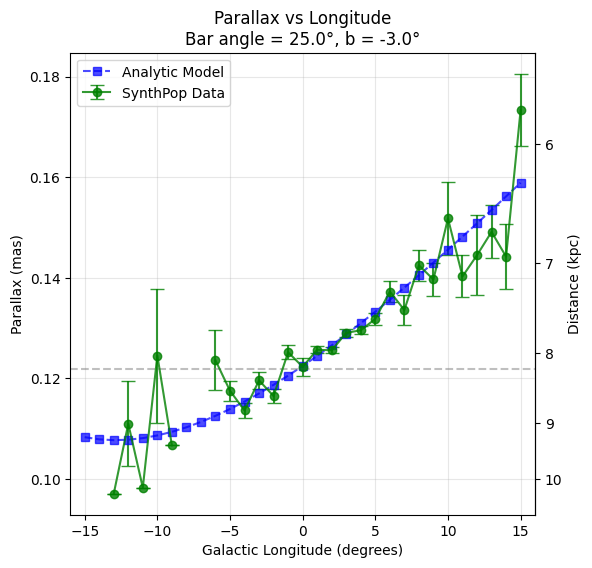

In [5]:
import pandas as pd
results_df = pd.DataFrame(results)

analytic_parallaxes = []
for l in results_df['longitude']:
    #distance = compute_bar_distance(l, fixed_b_deg, fixed_bar_angle, **custom_params)
    parallax = bar_parallax3D(l, fixed_b_deg, fixed_bar_angle, **custom_params)
    analytic_parallaxes.append(parallax)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(results_df['longitude'], results_df['clipped_parallax'], 
            yerr=results_df['clipped_parallax_error'], 
            fmt='o-', color='green', alpha=0.8, label='SynthPop Data', 
            capsize=5, markersize=6)
ax.plot(results_df['longitude'], analytic_parallaxes, 
        's--', color='blue', alpha=0.7, label='Analytic Model', markersize=6)
ax.set_xlabel('Galactic Longitude (degrees)')
ax.set_ylabel(f'Parallax (mas)')
ax.set_title(f'Parallax vs Longitude\nBar angle = {fixed_bar_angle}°, b = {fixed_b_deg}°')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xlim(-16, 16)
ax.axhline(1/8.2, color='gray', linestyle='--', alpha=0.5)

axsec = ax.secondary_yaxis('right', functions=(lambda x: 1/x, lambda x: 1/x))
axsec.set_ylabel('Distance (kpc)')

#plt.savefig('bar_angle_analytic_model_comparison.pdf', dpi=300)
plt.show()